<h1 align="center"><font color="yellow">Physics: Exercício 1 em Python</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Este script foi baseado no maravilhoso tutorial de [Mr.P Solver]().

# Setup

Aqui estamos trabalhando com `conda`:

```
conda create -n env_Fisica python=3.11.4
```

In [1]:
%conda install numpy pandas matplotlib scipy --yes

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /home/eddygiusepe/miniconda3/envs/LightningAI

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.26.0               |   py39h474f0d3_0         6.5 MB  conda-forge
    pandas-2.1.1               |   py39hddac248_1        11.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        18.3 MB

The following packages will be UPDATED:



In [1]:
# Instalamos este pacote para poder visualizar nossas bibliotecas instaladas:
%conda install watermark --yes

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /home/eddygiusepe/miniconda3/envs/LightningAI

  added / updated specs:
    - watermark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    openssl-3.1.4              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB


In [3]:
%load_ext watermark 
%watermark -v -p numpy,pandas,matplotlib,scipy

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.13.2

numpy     : 1.26.0
pandas    : 2.1.1
matplotlib: 3.7.1
scipy     : 1.10.1



# O exercício

Uma pessoa de $80kg$ salta de um avião que se move horizontalmente a $50m/s$ ($180km/h$). Seja a velocidade deles dada por $\vec{v}=(v_x, v_y)$. A força de atrito é dada por $\vec{F}_f=-b|\vec{v}|²\hat{v}$ e a gravidade é dada por $\vec{F}_g=-mg\hat{y}$. Sua velocidade terminal é $v_t=-55m/s$. Encontre a velocidade $\vec{v}(t)$ em todos os momentos e determine quanto tempo leva até que o pára-quedista chegue a $1\%$ da velocidade terminal.


<font color="orange">Quando você análisa a queda dessa persona, temos as seguintes equações físicas:</font>

$$\vec{F} = ma = m \binom{\frac{dv_x}{dt}}{\frac{dv_y}{dt}}$$

Duas forças:

* Gravidade: $$\vec{F}_g = -mg = -m \binom{0}{g}$$

* Atrito: $$\vec{F}_f = -b|\vec{v}|\vec{v} = -b \sqrt{v_x^2 + v_y^2} \binom{v_x}{v_y}$$




<font color="orange">Aplicando a segunda Lei de Newton:</font>


$$m\binom{\frac{dv_x}{dt}}{\frac{dv_y}{dt}}  = -m \binom{0}{g} -b \sqrt{v_x^2 + v_y^2} \binom{v_x}{v_y}$$

<font color="orange">Podemos obter:</font>

$$\frac{dv_x}{dt} = -\frac{b}{m} \sqrt{v_x^2 + v_y^2} v_x$$

$$\frac{dv_y}{dt} = -\frac{b}{m} \sqrt{v_x^2 + v_y^2} v_y - g$$



$\vec{S} = (v_x, v_y).$ Para resolver EDOs em Python.

A seguir definimos a função que recebe $t$ e $S$ e retorna $\frac{d\vec{S}}{dt}$:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # scipy é muito bom para resolver EDOs. Têm outras também!

In [5]:
def dSdt(S, t, g, m, b):
    """Esta função retorna uma lista das derivadas de vx e vy (taxas de variação delas)"""
    vx = S[0] # Atribui o primeiro elemento da lista 'S' à vx
    vy = S[1] # Atribui o segundo elemento da lista 'S' à vy
    return [
        -b/m * np.sqrt(vx**2+vy**2) * vx, #dvx/dt
        -g - b/m * np.sqrt(vx**2+vy**2) * vy #dvy/dt
    ]

<font color="orange">Forneça a função e as condições iniciais para solucionar a ODE. Forneça os tempos em que deseja a solução:</font>

In [6]:
t= np.linspace(0, 20 ,100) # valor inicial, o valor final e o número de pontos desejados na sequência (100 pontos igualmente espaçados).
g = 9.81
m = 80
vt = -55

b = m*g/vt**2
v0x, v0y = 50, 0

In [7]:
sol = odeint(dSdt, y0=[v0x, v0y], t=t, args=(g, m, b))


In [8]:
vx = sol.T[0] # T é transposta de uma matriz ou array
vy = sol.T[1]

In [11]:
type(vx), type(vy)

(numpy.ndarray, numpy.ndarray)

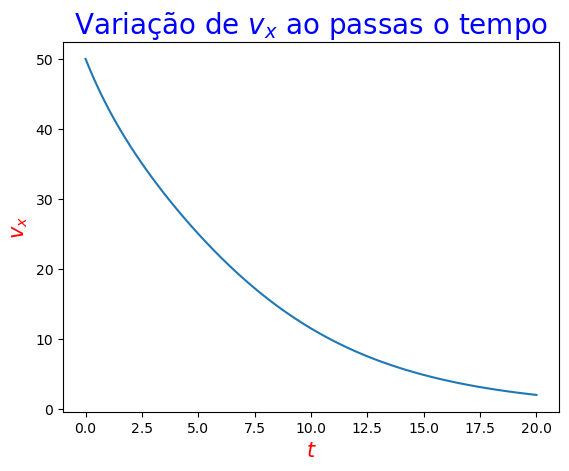

In [24]:
plt.plot(t, vx)
plt.title("Variação de $v_x$ ao passas o tempo", c='blue', size=20)
plt.ylabel('$v_x$', c='red', size=15)
plt.xlabel("$t$", c='red', size=15)
plt.show()


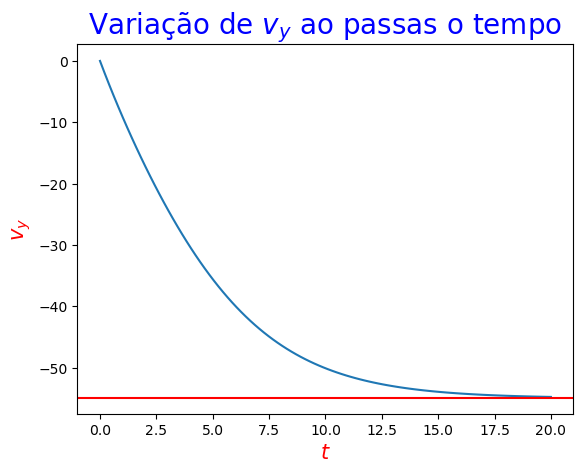

In [27]:
plt.plot(t, vy)
plt.axhline(vt, color='r')

plt.title("Variação de $v_y$ ao passas o tempo", c='blue', size=20)
plt.ylabel('$v_y$', c='red', size=15)
plt.xlabel("$t$", c='red', size=15)
plt.show()


<font color="orange">Quanto tempo até atingir a velocidade terminal?</font>

In [37]:
ind = np.abs(vy - vt)/np.abs(vt) < 0.01


In [38]:
ind 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [39]:
# Cerca de ~17 segundos você estará de 1% da velocidade terminal

t[ind]


array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])